<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap03/3_2_Shallow_Networks_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 3.2 -- Shallow neural networks II**

The purpose of this notebook is to gain some familiarity with shallow neural networks with 2D inputs.  It works through an example similar to figure 3.8 and experiments with different activation functions. <br><br>

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.


In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def draw_3D_function(ax, x1_mesh, x2_mesh, y):
    surf = ax.plot_surface(
        x1_mesh,
        x2_mesh,
        y,
        cmap="hot",
        vmin=-10,
        vmax=10,
        linewidth=0,
        antialiased=True,
    )

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")
    ax.set_zlabel("y")

    return surf

In [38]:
def plot_relu_kinks_3d(ax, x1_mesh, x2_mesh, y, pre_list, color="cyan"):
    """
    Рисует линии изломов ReLU (pre_i = 0) прямо на 3D-поверхности
    """
    for pre in pre_list:
        # Маска линии излома
        mask = np.abs(pre) < 0.02

        # Координаты линии
        x1_line = x1_mesh[mask]
        x2_line = x2_mesh[mask]
        y_line = y[mask]

        # Если точек слишком мало — пропускаем
        if len(x1_line) < 10:
            continue

        ax.plot(x1_line, x2_line, y_line, color=color, linewidth=3)

In [39]:
# Code to draw 2D function -- read it so you know what is going on, but you don't have to change it
def draw_2D_function(ax, x1_mesh, x2_mesh, y, zero_contour=False):
    pos = ax.contourf(x1_mesh, x2_mesh, y, levels=256, cmap="hot", vmin=-10, vmax=10.0)

    ax.set_xlabel("x1")
    ax.set_ylabel("x2")

    levels = np.arange(-10, 10, 1.0)
    ax.contour(x1_mesh, x2_mesh, y, levels, cmap="winter", linewidths=0.5)

    # 🔹 Линия излома ReLU: y = 0
    if zero_contour:
        ax.contour(
            x1_mesh,
            x2_mesh,
            y,
            levels=[0],
            colors="cyan",
            linewidths=2,
            linestyles="--",
        )


# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs(
    x1, x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3
):

    fig, ax = plt.subplots(3, 3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)

    # --- Preactivations (изломы ReLU) ---
    draw_2D_function(ax[0, 0], x1, x2, pre_1, zero_contour=True)
    ax[0, 0].set_title("Preactivation")

    draw_2D_function(ax[0, 1], x1, x2, pre_2, zero_contour=True)
    ax[0, 1].set_title("Preactivation")

    draw_2D_function(ax[0, 2], x1, x2, pre_3, zero_contour=True)
    ax[0, 2].set_title("Preactivation")

    # --- Activations ---
    draw_2D_function(ax[1, 0], x1, x2, act_1)
    ax[1, 0].set_title("Activation")

    draw_2D_function(ax[1, 1], x1, x2, act_2)
    ax[1, 1].set_title("Activation")

    draw_2D_function(ax[1, 2], x1, x2, act_3)
    ax[1, 2].set_title("Activation")

    # --- Weighted activations ---
    draw_2D_function(ax[2, 0], x1, x2, w_act_1)
    ax[2, 0].set_title("Weighted Act")

    draw_2D_function(ax[2, 1], x1, x2, w_act_2)
    ax[2, 1].set_title("Weighted Act")

    draw_2D_function(ax[2, 2], x1, x2, w_act_3)
    ax[2, 2].set_title("Weighted Act")

    plt.show()

    # ===== 3D output =====
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection="3d")

    surf = draw_3D_function(ax, x1, x2, y)

    plot_relu_kinks_3d(ax, x1, x2, y, pre_list=[pre_1, pre_2, pre_3])
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
    ax.set_title("Network output, $y$")

    # 🔹 Wireframe подчёркивает кусочно-линейную структуру
    ax.plot_wireframe(x1, x2, y, rstride=10, cstride=10, color="black", linewidth=0.5)

    plt.show()

In [40]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
    activation = preactivation.clip(0.0)
    return activation

In [41]:
# Define a shallow neural network with, two input, one output, and three hidden units
def shallow_2_1_3(
    x1,
    x2,
    activation_fn,
    phi_0,
    phi_1,
    phi_2,
    phi_3,
    theta_10,
    theta_11,
    theta_12,
    theta_20,
    theta_21,
    theta_22,
    theta_30,
    theta_31,
    theta_32,
):
    # TODO Replace the lines below to compute the three initial linear functions
    # (figure 3.8a-c) from the theta parameters.  These are the preactivations
    pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
    pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
    pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

    # Pass these through the ReLU function to compute the activations as in
    # figure 3.8 d-f
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)

    # TODO Replace the code below to weight the activations using phi1, phi2 and phi3
    # To create the equivalent of figure 3.8 g-i
    w_act_1 = phi_1 * act_1
    w_act_2 = phi_2 * act_2
    w_act_3 = phi_3 * act_3

    # TODO Replace the code below to combing the weighted activations and add
    # phi_0 to create the output as in figure 3.8j
    y = phi_0 + w_act_1 + w_act_2 + w_act_3

    # Return everything we have calculated
    return y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3

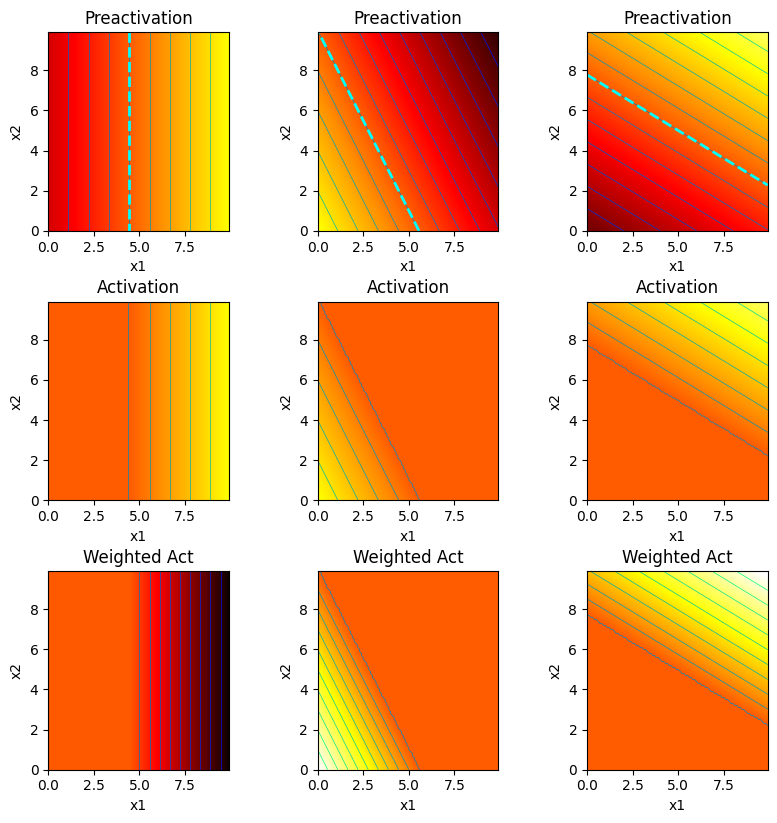

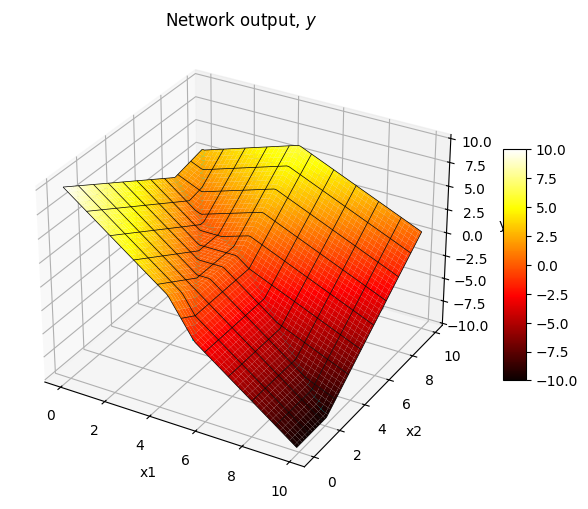

In [42]:
# Now lets define some parameters and run the neural network
theta_10 = -4.0
theta_11 = 0.9
theta_12 = 0.0
theta_20 = 5.0
theta_21 = -0.9
theta_22 = -0.5
theta_30 = -7
theta_31 = 0.5
theta_32 = 0.9
phi_0 = 0.0
phi_1 = -2.0
phi_2 = 2.0
phi_3 = 1.5

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1, x2 = np.meshgrid(x1, x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3 = shallow_2_1_3(
    x1,
    x2,
    ReLU,
    phi_0,
    phi_1,
    phi_2,
    phi_3,
    theta_10,
    theta_11,
    theta_12,
    theta_20,
    theta_21,
    theta_22,
    theta_30,
    theta_31,
    theta_32,
)
# And then plot it
plot_neural_2_inputs(
    x1, x2, y, pre_1, pre_2, pre_3, act_1, act_2, act_3, w_act_1, w_act_2, w_act_3
)

How many different linear polytopes are made by this model?  Identify each in the network output.

Now we'll extend this model to have two outputs $y_1$ and $y_2$, each of which can be visualized with a separate heatmap.  You will now have sets of parameters $\phi_{10}, \phi_{11}, \phi_{12}, \phi_{13}$ and $\phi_{20}, \phi_{21}, \phi_{22}, \phi_{23}$ that correspond to each of these outputs.

In [43]:
# Plot the shallow neural network.  We'll assume input in is range [0,10],[0,10] and output [-10,10]
def plot_neural_2_inputs_2_outputs(
    x1,
    x2,
    y1,
    y2,
    pre_1,
    pre_2,
    pre_3,
    act_1,
    act_2,
    act_3,
    w_act_11,
    w_act_12,
    w_act_13,
    w_act_21,
    w_act_22,
    w_act_23,
):

    # Plot intermediate plots if flag set
    fig, ax = plt.subplots(4, 3)
    fig.set_size_inches(8.5, 8.5)
    fig.tight_layout(pad=3.0)
    draw_2D_function(ax[0, 0], x1, x2, pre_1)
    ax[0, 0].set_title("Preactivation")
    draw_2D_function(ax[0, 1], x1, x2, pre_2)
    ax[0, 1].set_title("Preactivation")
    draw_2D_function(ax[0, 2], x1, x2, pre_3)
    ax[0, 2].set_title("Preactivation")
    draw_2D_function(ax[1, 0], x1, x2, act_1)
    ax[1, 0].set_title("Activation")
    draw_2D_function(ax[1, 1], x1, x2, act_2)
    ax[1, 1].set_title("Activation")
    draw_2D_function(ax[1, 2], x1, x2, act_3)
    ax[1, 2].set_title("Activation")
    draw_2D_function(ax[2, 0], x1, x2, w_act_11)
    ax[2, 0].set_title("Weighted Act 1")
    draw_2D_function(ax[2, 1], x1, x2, w_act_12)
    ax[2, 1].set_title("Weighted Act 1")
    draw_2D_function(ax[2, 2], x1, x2, w_act_13)
    ax[2, 2].set_title("Weighted Act 1")
    draw_2D_function(ax[3, 0], x1, x2, w_act_21)
    ax[3, 0].set_title("Weighted Act 2")
    draw_2D_function(ax[3, 1], x1, x2, w_act_22)
    ax[3, 1].set_title("Weighted Act 2")
    draw_2D_function(ax[3, 2], x1, x2, w_act_23)
    ax[3, 2].set_title("Weighted Act 2")
    plt.show()

    fig, ax = plt.subplots()
    draw_2D_function(ax, x1, x2, y1)
    ax.set_title("Network output, $y_1$")
    ax.set_aspect(1.0)
    plt.show()

    fig, ax = plt.subplots()
    draw_2D_function(ax, x1, x2, y2)
    ax.set_title("Network output, $y_2$")
    ax.set_aspect(1.0)
    plt.show()

In [ ]:
# Define a shallow neural network with, two inputs, two outputs, and three hidden units
def shallow_2_2_3(
    x1,
    x2,
    activation_fn,
    phi_10,
    phi_11,
    phi_12,
    phi_13,
    phi_20,
    phi_21,
    phi_22,
    phi_23,
    theta_10,
    theta_11,
    theta_12,
    theta_20,
    theta_21,
    theta_22,
    theta_30,
    theta_31,
    theta_32,
):

    # TODO -- write this function -- replace the dummy code below
    pre_1 = theta_10 + theta_11 * x1 + theta_12 * x2
    pre_2 = theta_20 + theta_21 * x1 + theta_22 * x2
    pre_3 = theta_30 + theta_31 * x1 + theta_32 * x2

    # Pass these through the ReLU function to compute the activations as in
    # figure 3.8 d-f
    act_1 = activation_fn(pre_1)
    act_2 = activation_fn(pre_2)
    act_3 = activation_fn(pre_3)
    w_act_11 = act_1 * phi_11
    w_act_12 = act_2 * phi_12
    w_act_13 = act_3 * phi_13
    w_act_21 = act_1 * phi_21
    w_act_22 = act_2 * phi_22
    w_act_23 = act_3 * phi_23
    y1 = phi_10 + w_act_11 + w_act_12 + w_act_13
    y2 = phi_20 + w_act_21 + w_act_22 + w_act_23

    # Return everything we have calculated
    return (
        y1,
        y2,
        pre_1,
        pre_2,
        pre_3,
        act_1,
        act_2,
        act_3,
        w_act_11,
        w_act_12,
        w_act_13,
        w_act_21,
        w_act_22,
        w_act_23,
    )

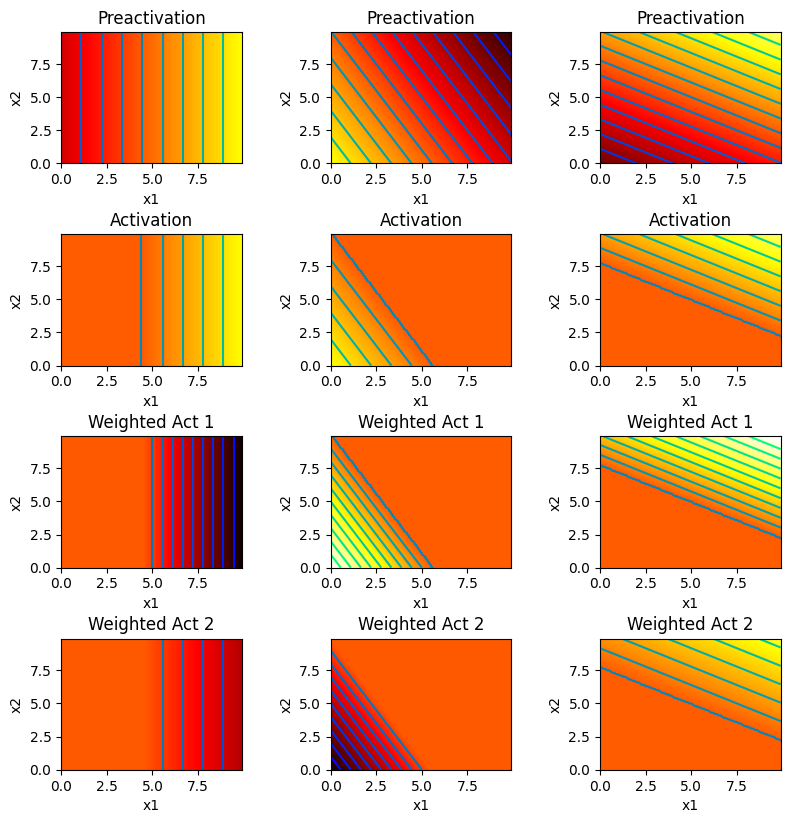

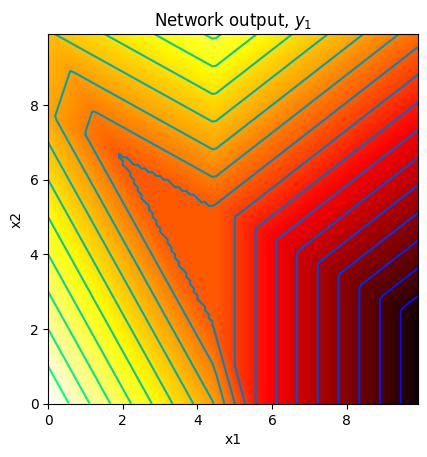

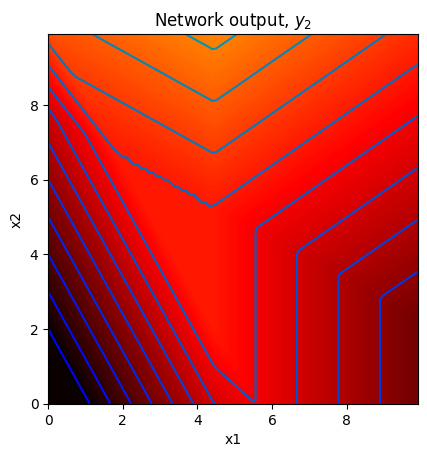

In [ ]:
# Now lets define some parameters and run the neural network
theta_10 = -4.0
theta_11 = 0.9
theta_12 = 0.0
theta_20 = 5.0
theta_21 = -0.9
theta_22 = -0.5
theta_30 = -7
theta_31 = 0.5
theta_32 = 0.9
phi_10 = 0.0
phi_11 = -2.0
phi_12 = 2.0
phi_13 = 1.5
phi_20 = -2.0
phi_21 = -1.0
phi_22 = -2.0
phi_23 = 0.8

x1 = np.arange(0.0, 10.0, 0.1)
x2 = np.arange(0.0, 10.0, 0.1)
x1, x2 = np.meshgrid(x1, x2)  # https://www.geeksforgeeks.org/numpy-meshgrid-function/

# We run the neural network for each of these input values
(
    y1,
    y2,
    pre_1,
    pre_2,
    pre_3,
    act_1,
    act_2,
    act_3,
    w_act_11,
    w_act_12,
    w_act_13,
    w_act_21,
    w_act_22,
    w_act_23,
) = shallow_2_2_3(
    x1,
    x2,
    ReLU,
    phi_10,
    phi_11,
    phi_12,
    phi_13,
    phi_20,
    phi_21,
    phi_22,
    phi_23,
    theta_10,
    theta_11,
    theta_12,
    theta_20,
    theta_21,
    theta_22,
    theta_30,
    theta_31,
    theta_32,
)
# And then plot it
plot_neural_2_inputs_2_outputs(
    x1,
    x2,
    y1,
    y2,
    pre_1,
    pre_2,
    pre_3,
    act_1,
    act_2,
    act_3,
    w_act_11,
    w_act_12,
    w_act_13,
    w_act_21,
    w_act_22,
    w_act_23,
)